In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS data/project/final_combined.csv')

In [ ]:
df.head()

,userID,placeID,rating,food_rating,service_rating,Rating_sum,latitude,longitude,smoker,drink_level,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,U1077,135085,2,2,2,6,22.156469,-100.985540,FALSE,social drinker,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
1,U1077,135038,2,2,1,5,22.156469,-100.985540,FALSE,social drinker,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,closed,none
2,U1077,132825,2,2,2,6,22.156469,-100.985540,FALSE,social drinker,...,No_Alcohol_Served,not permitted,informal,completely,low,?,quiet,t,closed,none
3,U1077,135060,1,2,2,5,22.156469,-100.985540,FALSE,social drinker,...,No_Alcohol_Served,none,informal,no_accessibility,medium,?,familiar,f,closed,none
4,U1068,135104,1,1,2,4,23.752269,-99.168605,FALSE,casual drinker,...,No_Alcohol_Served,none,informal,no_accessibility,medium,sushi-itto.com.mx,familiar,f,closed,none


In [ ]:
df.shape

(1161, 45)

In [ ]:
import copy
df2 = copy.deepcopy(df)

In [ ]:
df2['res_latitude'].isna().sum()

119

In [ ]:
df2 = df2.dropna().reset_index()

In [ ]:
df2.shape

(1042, 46)

In [ ]:
#Taking some important features from userprofile_df and print their value counts
features_user = df2
#Getting all information about features users
for col in features_user.columns.values:
        print(features_user[col].value_counts() , "\n--------------------------------------\n")

0       1
751     1
753     1
754     1
755     1
       ..
412     1
413     1
414     1
415     1
1158    1
Name: index, Length: 1042, dtype: int64 
--------------------------------------

U1106    18
U1061    16
U1024    15
U1134    15
U1089    14
         ..
U1107     1
U1021     1
U1080     1
U1063     1
U1043     1
Name: userID, Length: 130, dtype: int64 
--------------------------------------

135085    36
132825    32
135032    28
132834    25
135052    25
          ..
135109     4
135016     3
132766     3
134975     3
135011     3
Name: placeID, Length: 108, dtype: int64 
--------------------------------------

2    455
1    364
0    223
Name: rating, dtype: int64 
--------------------------------------

2    465
1    350
0    227
Name: food_rating, dtype: int64 
--------------------------------------

2    390
1    376
0    276
Name: service_rating, dtype: int64 
--------------------------------------

6    272
3    198
0    167
4    161
5    130
2     76
1     38
Name: Rati

In [ ]:
# TO-DO
#------
# drop non reqquired columns 
# replace ? with required values
# apply XGBoost from https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/


In [ ]:
df2 = df2.drop(['index', 'userID', 'placeID','food_rating', 'service_rating', 'latitude', 'longitude', 'birth_year', 'color', 'weight',
          'height', 'res_latitude', 'res_longitude', 'the_geom_meter', 'name', 'address', 'city', 'state', 'country', 'fax', 'zip', 'url', 
          'franchise'], axis = 1)

Replacing ? and combining classes

In [ ]:
df2['smoker'].value_counts()

FALSE    811
TRUE     204
?         27
Name: smoker, dtype: int64

In [ ]:
df2['smoker'].replace(['?'],
                        ['FALSE'], inplace=True)

In [ ]:
df2.head()

,rating,Rating_sum,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,age,...,activity,budget,alcohol,smoking_area,dress_code,accessibility,price,Rambience,area,other_services
0,2,6,FALSE,social drinker,elegant,family,public,married,kids,24,...,student,medium,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,closed,none
1,2,5,FALSE,social drinker,elegant,family,public,married,kids,24,...,student,medium,No_Alcohol_Served,none,informal,completely,low,familiar,closed,none
2,2,6,FALSE,social drinker,elegant,family,public,married,kids,24,...,student,medium,No_Alcohol_Served,not permitted,informal,completely,low,quiet,closed,none
3,1,5,FALSE,social drinker,elegant,family,public,married,kids,24,...,student,medium,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,closed,none
4,1,4,FALSE,casual drinker,informal,friends,public,single,independent,23,...,student,low,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,closed,none


In [ ]:
df2['smoker'].value_counts()

FALSE    838
TRUE     204
Name: smoker, dtype: int64

In [ ]:
df2['drink_level'].value_counts()

casual drinker    387
abstemious        332
social drinker    323
Name: drink_level, dtype: int64

In [ ]:
df2['dress_preference'].value_counts()

no preference    348
formal           327
informal         294
?                 45
elegant           28
Name: dress_preference, dtype: int64

In [ ]:
df2['dress_preference'].replace(['?', 'elegant'],
                        ['no preference', 'formal'], inplace=True)

In [ ]:
df2['dress_preference'].value_counts()

no preference    393
formal           355
informal         294
Name: dress_preference, dtype: int64

In [ ]:
df2['ambience'].value_counts()

family      549
friends     339
solitary    103
?            51
Name: ambience, dtype: int64

In [ ]:
df2['ambience'].replace(['?'],
                        ['family'], inplace=True)

In [ ]:
df2['ambience'].value_counts()

family      600
friends     339
solitary    103
Name: ambience, dtype: int64

In [ ]:
df2['transport'].value_counts()

public       587
car owner    286
on foot      132
?             37
Name: transport, dtype: int64

In [ ]:
df2['transport'].replace(['?', 'on foot'],
                        ['public', 'public'], inplace=True)

In [ ]:
df2['transport'].value_counts()

public       756
car owner    286
Name: transport, dtype: int64

In [ ]:
df2['marital_status'].value_counts()

single     928
married     61
?           34
widow       19
Name: marital_status, dtype: int64

In [ ]:
df2['marital_status'].replace(['?', 'widow'],
                        ['single', 'single'], inplace=True)
df2['marital_status'].value_counts()

single     981
married     61
Name: marital_status, dtype: int64

In [ ]:
df2['hijos'].value_counts()

independent    867
?               84
kids            77
dependent       14
Name: hijos, dtype: int64

In [ ]:
df2['hijos'].replace(['kids', '?'],
                        ['dependent', 'independent'], inplace=True)
df2['hijos'].value_counts()

independent    951
dependent       91
Name: hijos, dtype: int64

In [ ]:
df2['interest'].value_counts()

variety         368
none            261
technology      256
eco-friendly    113
retro            44
Name: interest, dtype: int64

In [ ]:
df2['personality'].value_counts()

hard-worker            482
thrifty-protector      417
hunter-ostentatious     98
conformist              45
Name: personality, dtype: int64

In [ ]:
df2['religion'].value_counts()

Catholic     787
none         202
Christian     40
Mormon        10
Jewish         3
Name: religion, dtype: int64

In [ ]:
df2['religion'].replace(['Christian', 'Mormon', 'Jewish'],
                        ['Catholic', 'Catholic', 'Catholic'], inplace=True)
df2['religion'].value_counts()

Catholic    840
none        202
Name: religion, dtype: int64

In [ ]:
df2['activity'].value_counts()

student          876
professional     109
?                 43
unemployed        10
working-class      4
Name: activity, dtype: int64

In [ ]:
df2['activity'].replace(['working-class', 'unemployed', '?'],
                        ['professional', 'student', 'student'], inplace=True)
df2['activity'].value_counts()

student         929
professional    113
Name: activity, dtype: int64

In [ ]:
df2['budget'].value_counts()

medium    646
low       293
?          63
high       40
Name: budget, dtype: int64

In [ ]:
df2['budget'].replace(['?'],
                        ['medium'], inplace=True)
df2['budget'].value_counts()

medium    709
low       293
high       40
Name: budget, dtype: int64

In [ ]:
df2['alcohol'].value_counts()

No_Alcohol_Served    797
Wine-Beer            242
Full_Bar               3
Name: alcohol, dtype: int64

In [ ]:
df2['smoking_area'].value_counts()

none             676
not permitted    363
section            3
Name: smoking_area, dtype: int64

In [ ]:
df2['smoking_area'].replace(['section'],
                        ['permitted'], inplace=True)
df2['smoking_area'].value_counts()

none             676
not permitted    363
permitted          3
Name: smoking_area, dtype: int64

In [ ]:
df2['dress_code'].value_counts()                                              #can be removed

informal    1034
casual         8
Name: dress_code, dtype: int64

In [ ]:
df2.columns

Index(['rating', 'Rating_sum', 'smoker', 'drink_level', 'dress_preference',
       'ambience', 'transport', 'marital_status', 'hijos', 'age', 'interest',
       'personality', 'religion', 'activity', 'budget', 'alcohol',
       'smoking_area', 'dress_code', 'accessibility', 'price', 'Rambience',
       'area', 'other_services'],
      dtype='object')

In [ ]:
df2['accessibility'].value_counts()

completely          593
no_accessibility    449
Name: accessibility, dtype: int64

In [ ]:
df2['price'].value_counts()

low       625
medium    414
high        3
Name: price, dtype: int64

In [ ]:
df2['Rambience'].value_counts()

familiar    698
quiet       344
Name: Rambience, dtype: int64

In [ ]:
df2['area'].value_counts()                                                   # can be removed

closed    1008
open        34
Name: area, dtype: int64

In [ ]:
df2['other_services'].value_counts()

none        965
variety      73
Internet      4
Name: other_services, dtype: int64

In [ ]:
df2['other_services'].replace(['Internet'],
                        ['variety'], inplace=True)
df2['other_services'].value_counts()

none       965
variety     77
Name: other_services, dtype: int64

In [ ]:
df2.head()

,rating,Rating_sum,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,age,...,activity,budget,alcohol,smoking_area,dress_code,accessibility,price,Rambience,area,other_services
0,2,6,FALSE,social drinker,formal,family,public,married,dependent,24,...,student,medium,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,closed,none
1,2,5,FALSE,social drinker,formal,family,public,married,dependent,24,...,student,medium,No_Alcohol_Served,none,informal,completely,low,familiar,closed,none
2,2,6,FALSE,social drinker,formal,family,public,married,dependent,24,...,student,medium,No_Alcohol_Served,not permitted,informal,completely,low,quiet,closed,none
3,1,5,FALSE,social drinker,formal,family,public,married,dependent,24,...,student,medium,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,closed,none
4,1,4,FALSE,casual drinker,informal,friends,public,single,independent,23,...,student,low,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,closed,none


In [ ]:
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/FDS data/project/auto_generated.csv')

### apply XGBoost from https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

In [ ]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
# load data

import copy 
dataset = copy.deepcopy(df2)
dataset = dataset.drop(['Rating_sum'], axis = 1)


In [ ]:
# split data into X and y
X = dataset.iloc[:,1:22]
Y = dataset.iloc[:,0]

# X = X.drop(['dress_code', 'hijos', 'religion'], axis=1)
# X = X.drop(['area', 'accessibility', 'other_services'], axis=1)
X = X.drop(['area', 'dress_code', 'hijos', 'religion', 'accessibility', 'other_services'], axis=1)


In [ ]:
dataset.columns

Index(['rating', 'smoker', 'drink_level', 'dress_preference', 'ambience',
       'transport', 'marital_status', 'hijos', 'age', 'interest',
       'personality', 'religion', 'activity', 'budget', 'alcohol',
       'smoking_area', 'dress_code', 'accessibility', 'price', 'Rambience',
       'area', 'other_services'],
      dtype='object')

In [ ]:
X.columns

Index(['smoker', 'drink_level', 'dress_preference', 'ambience', 'transport',
       'marital_status', 'age', 'interest', 'personality', 'activity',
       'budget', 'alcohol', 'smoking_area', 'price', 'Rambience'],
      dtype='object')

### Data transformation from categorical to numerical, bool, float


In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
ohe = OneHotEncoder(sparse=True)

In [ ]:
# X['dress_preference'].value_counts()

In [ ]:
for col_name in ['smoker', 'drink_level', 'dress_preference', 'ambience', 'transport',
       'marital_status', 'interest', 'personality', 'activity',
       'budget', 'alcohol', 'smoking_area', 'price', 'Rambience']:
       X[col_name] = le.fit_transform(X[col_name])

In [ ]:
# X = ohe.fit_transform(X).toarray()

In [ ]:
X

,smoker,drink_level,dress_preference,ambience,transport,marital_status,age,interest,personality,activity,budget,alcohol,smoking_area,price,Rambience
0,0,2,0,0,1,0,24,3,3,1,2,1,1,2,0
1,0,2,0,0,1,0,24,3,3,1,2,1,0,1,0
2,0,2,0,0,1,0,24,3,3,1,2,1,1,1,1
3,0,2,0,0,1,0,24,3,3,1,2,1,0,2,0
4,0,1,1,1,1,1,23,3,3,1,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0,0,2,2,1,1,22,4,3,1,2,1,0,2,0
1038,0,0,2,2,1,1,22,4,3,1,2,1,0,1,0
1039,0,0,2,2,1,1,22,4,3,1,2,1,1,1,1
1040,0,0,2,2,1,1,22,3,1,1,2,1,0,1,0


20 mean accuracy
All models from https://analyticsindiamag.com/7-types-classification-algorithms/


In [ ]:
all_models_accuracies = {}

In [ ]:
# split data into train and test sets
total = 0
for seed in range(0,10):
  test_size = 0.30
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
  # fit model no training data
  model = XGBRegressor( eta =0.1 , eval_metric = 'rmse', 
                  n_estimators = 400 , seed = 123)
  model.fit(X_train, y_train)
  # make predictions for test data
  y_pred = model.predict(X_test)
  predictions = [round(value) for value in y_pred]
  y_test = y_test.tolist()
  for i in range(len(predictions)):
    if predictions[i] == 0 or predictions[i] == 1:
      predictions[i]=0
    if predictions[i] == 2 or predictions[i] == 3:
      predictions[i]=1
    if predictions[i] == 4 or predictions[i] == 5 or predictions[i] == 6:
      predictions[i]=2
  for i in range(len(y_test)):
    if y_test[i] == 0 or y_test[i] == 1:
      y_test[i]=0
    if y_test[i] == 2 or y_test[i] == 3:
      y_test[i]=1
    if y_test[i] == 4 or y_test[i] == 5 or y_test[i] == 6:
      y_test[i]=2
  # evaluate predictions
  accuracy = accuracy_score(y_test, predictions)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  total = total + accuracy
print("Final Accuracy: %.2f%%" % (total * 100.0/10))
all_models_accuracies['XGBoostClassifier'] = (total * 100.0/10) 

[01:14:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 70.61%
[01:14:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 66.77%
[01:14:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 67.41%
[01:14:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 61.66%
[01:14:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 66.45%
[01:14:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 61.02%
[01:14:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy:

In [ ]:
XGBoost_accuracies = {}
for n_estimator in range(1,500,5):
  total = 0
  for seed in range(0,10):
    test_size = 0.30
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    # fit model no training data
    model = XGBRegressor( eta =0.1 , eval_metric = 'rmse', 
                    n_estimators = n_estimator , seed = 123)
    model.fit(X_train, y_train)
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    y_test = y_test.tolist()
    for i in range(len(predictions)):
      if predictions[i] == 0 or predictions[i] == 1:
        predictions[i]=0
      if predictions[i] == 2 or predictions[i] == 3:
        predictions[i]=1
      if predictions[i] == 4 or predictions[i] == 5 or predictions[i] == 6:
        predictions[i]=2
    for i in range(len(y_test)):
      if y_test[i] == 0 or y_test[i] == 1:
        y_test[i]=0
      if y_test[i] == 2 or y_test[i] == 3:
        y_test[i]=1
      if y_test[i] == 4 or y_test[i] == 5 or y_test[i] == 6:
        y_test[i]=2
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    total = total + accuracy
  print("Final Accuracy: %.2f%%" % (total * 100.0/10))
  XGBoost_accuracies[n_estimator] = (total * 100.0/10)


[01:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 58.79%
[01:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 58.79%
[01:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 60.70%
[01:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 55.91%
[01:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 54.31%
[01:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 56.23%
[01:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy:

In [ ]:
import plotly.graph_objects as go
# create trace1
trace1 = go.Bar(
                x = list(XGBoost_accuracies.keys()),
                y = list(XGBoost_accuracies.values()),
                marker = dict(color = 'rgb(0, 128, 128)',
                              line=dict(color='rgb(0,0,0)',width=1)))
layout = go.Layout(title = 'Accuracy of different n_estimators in XGBoost Classifier' , xaxis = dict(title = 'Different XGBoost n_estimators'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

ROC_AUC score of XGBoost algorithm

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# cm = confusion_matrix(y_test, predictions)
# # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
# cm_df = pd.DataFrame(cm,
#                      index = ['0','1','2','3','4'], 
#                      columns = ['0','1','2','3','4'])
# plt.figure(figsize=(5,4))
# sns.heatmap(cm_df, annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()


.Let us calculate the TP, TN, FP, FN values for the class Setosa using the Above tricks:

TP: The actual value and predicted value should be the same. So concerning Setosa class, the value of cell 1 is the TP value.

FN: The sum of values of corresponding rows except the TP value

FN = (cell 2 + cell3)

= (0 + 0)

= 0

FP : The sum of values of corresponding column except the TP value.

FP = (cell 4 + cell 7)

= (0 + 0)

= 0

TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.

TN = (cell 5 + cell 6 + cell 8 + cell 9)

= 17 + 1 +0 + 11

= 29


In [ ]:
tp=27
fn=39
fp=12
tn=140+33+62

In [ ]:
precision = tp/(tp+fp)
print(precision)

0.6923076923076923


In [ ]:
recall = tp/(tp+fn)
print(recall)

0.4090909090909091


In [ ]:
f1_score = 2*(precision*recall)/(precision+recall)
print(f1_score)

0.5142857142857142


In [ ]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
total = 0
for seed in range(0,10):
  test_size = 0.30
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
  # fit model no training data
  clf=RandomForestClassifier(n_estimators=10)

  #Train the model using the training sets y_pred=clf.predict(X_test)
  clf.fit(X_train,y_train)

  y_pred=clf.predict(X_test)
  predictions = [round(value) for value in y_pred]
  # evaluate predictions
  accuracy = accuracy_score(y_test, predictions)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  total = total + accuracy
print("Final Accuracy: %.2f%%" % (total * 100.0/10))
all_models_accuracies['RandomForestClassifier'] = (total * 100.0/10)

Accuracy: 53.99%
Accuracy: 52.72%
Accuracy: 54.63%
Accuracy: 53.04%
Accuracy: 53.67%
Accuracy: 47.92%
Accuracy: 58.47%
Accuracy: 55.59%
Accuracy: 58.79%
Accuracy: 55.59%
Final Accuracy: 54.44%


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
total = 0
for seed in range(0,10):
  test_size = 0.30
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
  # fit model no training data
  clf=AdaBoostClassifier(n_estimators=100)

  #Train the model using the training sets y_pred=clf.predict(X_test)
  clf.fit(X_train,y_train)

  y_pred=clf.predict(X_test)
  predictions = [round(value) for value in y_pred]
  # evaluate predictions
  accuracy = accuracy_score(y_test, predictions)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  total = total + accuracy
print("Final Accuracy: %.2f%%" % (total * 100.0/10))
all_models_accuracies['AdaBoostClassifier'] = (total * 100.0/10)

Accuracy: 54.63%
Accuracy: 46.96%
Accuracy: 46.01%
Accuracy: 47.92%
Accuracy: 50.16%
Accuracy: 44.41%
Accuracy: 51.76%
Accuracy: 51.12%
Accuracy: 49.52%
Accuracy: 50.80%
Final Accuracy: 49.33%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_depths = {}
for max_depth in range(1,50):
  total = 0
  for seed in range(0,10):
    test_size = 0.30
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    # fit model no training data
    clf=DecisionTreeClassifier(max_depth=max_depth,max_features=None,min_samples_leaf=10) #iterate over max_samples_leaf

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    total = total + accuracy
  print("Final Accuracy: %.2f%%" % (total * 100.0/10))
  decision_tree_depths[max_depth] = (total * 100.0/10)
all_models_accuracies['DecisionTreeClassifier'] = (total * 100.0/10)

Accuracy: 41.21%
Accuracy: 41.21%
Accuracy: 39.30%
Accuracy: 44.09%
Accuracy: 41.53%
Accuracy: 41.21%
Accuracy: 43.13%
Accuracy: 48.24%
Accuracy: 41.85%
Accuracy: 43.77%
Final Accuracy: 42.56%
Accuracy: 45.37%
Accuracy: 47.28%
Accuracy: 42.17%
Accuracy: 44.09%
Accuracy: 44.73%
Accuracy: 43.77%
Accuracy: 45.69%
Accuracy: 47.28%
Accuracy: 48.56%
Accuracy: 45.69%
Final Accuracy: 45.46%
Accuracy: 46.01%
Accuracy: 46.01%
Accuracy: 45.69%
Accuracy: 46.65%
Accuracy: 46.01%
Accuracy: 47.28%
Accuracy: 47.28%
Accuracy: 47.28%
Accuracy: 48.88%
Accuracy: 47.92%
Final Accuracy: 46.90%
Accuracy: 52.40%
Accuracy: 48.56%
Accuracy: 42.17%
Accuracy: 50.80%
Accuracy: 52.08%
Accuracy: 51.12%
Accuracy: 47.60%
Accuracy: 49.84%
Accuracy: 55.59%
Accuracy: 51.12%
Final Accuracy: 50.13%
Accuracy: 50.48%
Accuracy: 49.20%
Accuracy: 48.56%
Accuracy: 49.20%
Accuracy: 49.52%
Accuracy: 50.16%
Accuracy: 48.56%
Accuracy: 43.13%
Accuracy: 53.99%
Accuracy: 52.40%
Final Accuracy: 49.52%
Accuracy: 54.31%
Accuracy: 48.56%
A

In [ ]:
import plotly.graph_objects as go
# create trace1
trace1 = go.Bar(
                x = list(decision_tree_depths.keys()),
                y = list(decision_tree_depths.values()),
                marker = dict(color = 'rgb(0, 128, 128)',
                              line=dict(color='rgb(0,0,0)',width=1)))
layout = go.Layout(title = 'Accuracy of different tree depths of Decision Tree classifier' , xaxis = dict(title = 'Different Decision tree depths'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_depths = {}
for max_depth in range(1,300):
  total = 0
  for seed in range(0,10):
    test_size = 0.30
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    # fit model no training data
    clf=DecisionTreeClassifier(max_depth=10,max_features=None,min_samples_leaf=max_depth) #iterate over max_samples_leaf

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    total = total + accuracy
  print("Final Accuracy: %.2f%%" % (total * 100.0/10))
  decision_tree_depths[max_depth] = (total * 100.0/10)
all_models_accuracies['DecisionTreeClassifier'] = (total * 100.0/10)

Accuracy: 53.04%
Accuracy: 50.16%
Accuracy: 56.55%
Accuracy: 46.96%
Accuracy: 47.60%
Accuracy: 48.24%
Accuracy: 52.08%
Accuracy: 53.04%
Accuracy: 54.31%
Accuracy: 54.95%
Final Accuracy: 51.69%
Accuracy: 53.99%
Accuracy: 51.76%
Accuracy: 55.59%
Accuracy: 46.33%
Accuracy: 50.80%
Accuracy: 52.08%
Accuracy: 53.99%
Accuracy: 55.59%
Accuracy: 53.99%
Accuracy: 55.27%
Final Accuracy: 52.94%
Accuracy: 56.87%
Accuracy: 50.80%
Accuracy: 52.72%
Accuracy: 47.92%
Accuracy: 51.44%
Accuracy: 50.80%
Accuracy: 56.23%
Accuracy: 54.95%
Accuracy: 55.91%
Accuracy: 54.31%
Final Accuracy: 53.19%
Accuracy: 59.42%
Accuracy: 52.72%
Accuracy: 51.44%
Accuracy: 49.84%
Accuracy: 52.72%
Accuracy: 50.48%
Accuracy: 55.27%
Accuracy: 57.83%
Accuracy: 54.95%
Accuracy: 51.44%
Final Accuracy: 53.61%
Accuracy: 56.55%
Accuracy: 54.31%
Accuracy: 53.04%
Accuracy: 50.48%
Accuracy: 53.67%
Accuracy: 52.72%
Accuracy: 57.19%
Accuracy: 56.55%
Accuracy: 51.44%
Accuracy: 54.63%
Final Accuracy: 54.06%
Accuracy: 55.91%
Accuracy: 51.76%
A

In [ ]:
import plotly.graph_objects as go
# create trace1
trace1 = go.Bar(
                x = list(decision_tree_depths.keys()),
                y = list(decision_tree_depths.values()),
                marker = dict(color = 'rgb(0, 128, 128)',
                              line=dict(color='rgb(0,0,0)',width=1)))
layout = go.Layout(title = 'Accuracy of different min samples leaf of Decision Tree classifier' , xaxis = dict(title = 'Different Decision min samples leaf'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_depths = {}
for max_depth in range(1,16):
  total = 0
  for seed in range(0,10):
    test_size = 0.30
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    # fit model no training data
    clf=DecisionTreeClassifier(max_depth=10,max_features=max_depth,min_samples_leaf=9) #iterate over max_samples_leaf

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    total = total + accuracy
  print("Final Accuracy: %.2f%%" % (total * 100.0/10))
  decision_tree_depths[max_depth] = (total * 100.0/10)
all_models_accuracies['DecisionTreeClassifier'] = (total * 100.0/10)

Accuracy: 41.21%
Accuracy: 37.38%
Accuracy: 41.85%
Accuracy: 48.56%
Accuracy: 43.77%
Accuracy: 41.53%
Accuracy: 53.99%
Accuracy: 43.13%
Accuracy: 49.20%
Accuracy: 46.65%
Final Accuracy: 44.73%
Accuracy: 44.41%
Accuracy: 46.01%
Accuracy: 53.04%
Accuracy: 50.80%
Accuracy: 49.20%
Accuracy: 48.56%
Accuracy: 48.24%
Accuracy: 50.48%
Accuracy: 50.80%
Accuracy: 49.52%
Final Accuracy: 49.11%
Accuracy: 49.52%
Accuracy: 47.28%
Accuracy: 49.52%
Accuracy: 53.35%
Accuracy: 46.65%
Accuracy: 43.77%
Accuracy: 51.12%
Accuracy: 45.69%
Accuracy: 57.19%
Accuracy: 51.12%
Final Accuracy: 49.52%
Accuracy: 51.12%
Accuracy: 50.16%
Accuracy: 48.56%
Accuracy: 52.72%
Accuracy: 49.52%
Accuracy: 50.80%
Accuracy: 50.16%
Accuracy: 45.69%
Accuracy: 49.84%
Accuracy: 48.56%
Final Accuracy: 49.71%
Accuracy: 50.48%
Accuracy: 48.56%
Accuracy: 49.20%
Accuracy: 48.88%
Accuracy: 54.63%
Accuracy: 53.35%
Accuracy: 53.04%
Accuracy: 48.56%
Accuracy: 53.35%
Accuracy: 44.73%
Final Accuracy: 50.48%
Accuracy: 55.91%
Accuracy: 46.01%
A

In [ ]:
import plotly.graph_objects as go
# create trace1
trace1 = go.Bar(
                x = list(decision_tree_depths.keys()),
                y = list(decision_tree_depths.values()),
                marker = dict(color = 'rgb(0, 128, 128)',
                              line=dict(color='rgb(0,0,0)',width=1)))
layout = go.Layout(title = 'Accuracy of different max_features of Decision Tree classifier' , xaxis = dict(title = 'Different Decision tree max_features'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [ ]:
from sklearn.svm import SVC
total = 0
SVM_kernels =['linear', 'poly', 'rbf', 'sigmoid'] #cant use precomputed
svm_accuracies={}
for kernel in SVM_kernels:
  total=0
  for seed in range(0,10):
    test_size = 0.30
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    # fit model no training data
    clf=SVC(kernel=kernel,C=0.025)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    total = total + accuracy
  print("Final Accuracy: %.2f%%" % (total * 100.0/10))
  svm_accuracies[kernel] = (total * 100.0/10)
all_models_accuracies['SVM'] = max(svm_accuracies.values())

Accuracy: 44.41%
Accuracy: 44.73%
Accuracy: 43.77%
Accuracy: 48.88%
Accuracy: 46.33%
Accuracy: 41.85%
Accuracy: 46.65%
Accuracy: 51.12%
Accuracy: 47.28%
Accuracy: 47.60%
Final Accuracy: 46.26%
Accuracy: 41.21%
Accuracy: 41.21%
Accuracy: 39.30%
Accuracy: 44.09%
Accuracy: 45.69%
Accuracy: 43.77%
Accuracy: 44.09%
Accuracy: 48.24%
Accuracy: 46.33%
Accuracy: 43.45%
Final Accuracy: 43.74%
Accuracy: 41.21%
Accuracy: 41.21%
Accuracy: 39.30%
Accuracy: 44.09%
Accuracy: 45.69%
Accuracy: 43.77%
Accuracy: 44.09%
Accuracy: 48.24%
Accuracy: 46.33%
Accuracy: 43.45%
Final Accuracy: 43.74%
Accuracy: 41.21%
Accuracy: 41.21%
Accuracy: 39.30%
Accuracy: 44.09%
Accuracy: 45.69%
Accuracy: 43.77%
Accuracy: 44.09%
Accuracy: 48.24%
Accuracy: 46.33%
Accuracy: 43.45%
Final Accuracy: 43.74%


In [ ]:
import plotly.graph_objects as go
# create trace1
trace1 = go.Bar(
                x = list(svm_accuracies.keys()),
                y = list(svm_accuracies.values()),
                marker = dict(color = 'rgb(0, 128, 128)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'Accuracy of different SVM Kernels Models' , xaxis = dict(title = 'Different kernel Models'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [ ]:
from sklearn.naive_bayes import CategoricalNB
total = 0
for seed in range(0,10):
  test_size = 0.30
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
  # fit model no training data
  clf=CategoricalNB()

  #Train the model using the training sets y_pred=clf.predict(X_test)
  clf.fit(X_train,y_train)

  y_pred=clf.predict(X_test)
  predictions = [round(value) for value in y_pred]
  # evaluate predictions
  accuracy = accuracy_score(y_test, predictions)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  total = total + accuracy
print("Final Accuracy: %.2f%%" % (total * 100.0/10))
all_models_accuracies['CategoricalNaiveBayes'] = (total * 100.0/10)

Accuracy: 48.24%
Accuracy: 46.65%
Accuracy: 43.45%
Accuracy: 51.44%
Accuracy: 50.16%
Accuracy: 43.45%
Accuracy: 47.28%
Accuracy: 50.80%
Accuracy: 50.16%
Accuracy: 47.60%
Final Accuracy: 47.92%


In [ ]:
from sklearn.linear_model import SGDClassifier
total = 0
for seed in range(0,10):
  test_size = 0.30
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
  # fit model no training data
  clf=SGDClassifier(loss='modified_huber')

  #Train the model using the training sets y_pred=clf.predict(X_test)
  clf.fit(X_train,y_train)

  y_pred=clf.predict(X_test)
  predictions = [round(value) for value in y_pred]
  # evaluate predictions
  accuracy = accuracy_score(y_test, predictions)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  total = total + accuracy
print("Final Accuracy: %.2f%%" % (total * 100.0/10))
all_models_accuracies['SGDClassifier'] = (total * 100.0/10)

Accuracy: 41.21%
Accuracy: 44.73%
Accuracy: 39.30%
Accuracy: 38.34%
Accuracy: 46.01%
Accuracy: 34.19%
Accuracy: 43.45%
Accuracy: 21.09%
Accuracy: 47.92%
Accuracy: 35.46%
Final Accuracy: 39.17%


## Hyperparameter tuning of KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,Y)
#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])

P=1 means manhattan distance(l1)

P=2 means Eucledian Distance(l2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
total = 0
for seed in range(0,10):
  test_size = 0.30
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
  # fit model no training data
  accuracy_list = []
  y_test=y_test.tolist()
  for i in range(len(y_test)):
    if y_test[i] == 0 or y_test[i] == 1:
      y_test[i]=0
    if y_test[i] == 2 or y_test[i] == 3:
      y_test[i]=1
    if y_test[i] == 4 or y_test[i] == 5 or y_test[i] == 6:
      y_test[i]=2

  for K in range(2,30):
    clf=KNeighborsClassifier(n_neighbors=K, p=2)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    predictions = [round(value) for value in y_pred]
    for i in range(len(predictions)):
      if predictions[i] == 0 or predictions[i] == 1:
        predictions[i]=0
      if predictions[i] == 2 or predictions[i] == 3:
        predictions[i]=1
      if predictions[i] == 4 or predictions[i] == 5 or predictions[i] == 6:
        predictions[i]=2
    
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    total = total + accuracy
    accuracy_list.append(accuracy*100)
print(accuracy_list)
all_models_accuracies['KNN, K=5'] = max(accuracy_list)

Accuracy: 64.22%
Accuracy: 66.45%
Accuracy: 66.45%
Accuracy: 68.37%
Accuracy: 69.33%
Accuracy: 69.01%
Accuracy: 67.73%
Accuracy: 67.41%
Accuracy: 67.09%
Accuracy: 67.09%
Accuracy: 66.77%
Accuracy: 65.18%
Accuracy: 67.09%
Accuracy: 65.50%
Accuracy: 66.77%
Accuracy: 65.18%
Accuracy: 68.37%
Accuracy: 66.13%
Accuracy: 66.45%
Accuracy: 64.86%
Accuracy: 67.73%
Accuracy: 68.05%
Accuracy: 65.50%
Accuracy: 64.86%
Accuracy: 67.09%
Accuracy: 64.22%
Accuracy: 64.54%
Accuracy: 63.26%
Accuracy: 64.22%
Accuracy: 68.05%
Accuracy: 63.58%
Accuracy: 65.50%
Accuracy: 67.41%
Accuracy: 65.50%
Accuracy: 65.18%
Accuracy: 64.86%
Accuracy: 62.94%
Accuracy: 63.26%
Accuracy: 64.86%
Accuracy: 64.54%
Accuracy: 64.86%
Accuracy: 65.18%
Accuracy: 64.54%
Accuracy: 63.26%
Accuracy: 62.30%
Accuracy: 62.94%
Accuracy: 61.02%
Accuracy: 62.94%
Accuracy: 61.34%
Accuracy: 61.02%
Accuracy: 61.66%
Accuracy: 60.38%
Accuracy: 58.79%
Accuracy: 60.06%
Accuracy: 59.74%
Accuracy: 61.02%
Accuracy: 67.09%
Accuracy: 64.86%
Accuracy: 63.5

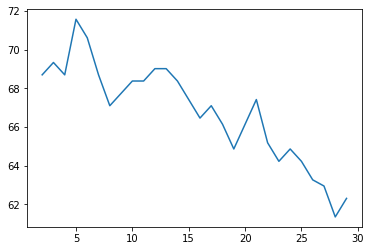

In [ ]:
import matplotlib.pyplot as plt
xs = [x+2 for x in range(len(accuracy_list))]
plt.plot(xs, accuracy_list)
plt.show()
# Make sure to close the plt object once done
plt.close()

In [ ]:
import plotly.graph_objects as go
# create trace1
trace1 = go.Bar(
                x = list(all_models_accuracies.keys()),
                y = list(all_models_accuracies.values()),
                marker = dict(color = 'rgb(0, 128, 128)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'Accuracy of different Classifier Models' , xaxis = dict(title = 'Classifier Models'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

## Fetching top 20 restaurants using User Profile:


In [ ]:
import copy
dataset = copy.deepcopy(df2)

In [ ]:
dataset.columns

Index(['rating', 'Rating_sum', 'smoker', 'drink_level', 'dress_preference',
       'ambience', 'transport', 'marital_status', 'hijos', 'age', 'interest',
       'personality', 'religion', 'activity', 'budget', 'alcohol',
       'smoking_area', 'dress_code', 'accessibility', 'price', 'Rambience',
       'area', 'other_services'],
      dtype='object')

In [ ]:
dataset = dataset.drop(['rating'], axis = 1)

In [ ]:
restaurants_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FDS data/project/unique_restaurant_details_flawless.csv")

In [ ]:
#@title GET USER DETAILS


smoker = 'FALSE' #@param ["FALSE", "TRUE"]

drink_level = 'social drinker' #@param ['abstemious','social drinker','casual drinker']

dress_preference = 'formal' #@param ['informal','formal','no preference']

ambience = 'friends' #@param ['family','friends','solitary']

transport = 'car owner' #@param ['public','car owner']

marital_status = 'married' #@param ['single','married']

age = 52 #@param {type:"slider", min:0, max:100, step:1}

interest = 'technology' #@param ['variety','technology','none','retro','eco-friendly']

personality = 'hunter-ostentatious' #@param ['thrifty-protector','hunter-ostentatious','hard-worker','conformist']

activity = 'student' #@param ['student','professional']

budget = 'low' #@param ['low', 'medium' ,'high']



user_latitude = 19.966748 #@param {type:"slider", min:18.813348, max:23.77103, step:0.0001}

user_longitude = -100.66338 #@param {type:"slider", min:-101.05468, max:-99.067106, step:0.0001}

In [ ]:
for index, row in restaurants_df.iterrows():
  alcohol = row['alcohol']
  smoking_area = row['smoking_area']
  price = row['price']
  Rambience = row['Rambience']
  data_dict = {'smoker':smoker, 'drink_level':drink_level, 'dress_preference':dress_preference, 'ambience':ambience, 'transport':transport,
        'marital_status':marital_status, 'age':age, 'interest':interest, 'personality':personality, 'activity':activity,
        'budget':budget, 'alcohol':alcohol, 'smoking_area':smoking_area, 'price':price, 'Rambience':Rambience}

  dataset = dataset.append(data_dict,ignore_index=True)

#one hot encoding
for col_name in ['smoker', 'drink_level', 'dress_preference', 'ambience', 'transport',
       'marital_status', 'interest', 'personality', 'activity',
       'budget', 'alcohol', 'smoking_area', 'price', 'Rambience']:
       dataset[col_name] = le.fit_transform(dataset[col_name])


X = dataset.iloc[:1042,1:]
Y = dataset.iloc[:1042,0]
X_to_be_predicted = dataset.iloc[1042:,1:]
X = X.drop(['area', 'dress_code', 'hijos', 'religion', 'accessibility', 'other_services'], axis=1)
X_to_be_predicted = X_to_be_predicted.drop(['area', 'dress_code', 'hijos', 'religion', 'accessibility', 'other_services'], axis=1)



In [ ]:
Y.isna().sum()

0

In [ ]:
clf=KNeighborsClassifier(n_neighbors=5, p=2)
clf.fit(X,Y)

y_pred=clf.predict(X_to_be_predicted)

In [ ]:
# print(y_pred)

# FIND PREDICTED RANKINGS OF RESTAURANTS
rank = []
for i in range(6,-1,-1):
  for j in range(len(y_pred)):
    if y_pred[j] == i:
      rank.append(j)

# print(rank)

In [ ]:
# GET TOP 20 RANKINGS OF RESTAURANTS
top_20=rank[:20]
# print(top_20)

In [ ]:
!pip install texttable

In [ ]:

restaurants=[]
restaurants.append(['Rank','Name', 'City'])
counter=0
for index in top_20:
  index = counter
  counter += 1
  name = restaurants_df.iloc[index]['name']
  city = restaurants_df.iloc[index]['city']
  restaurants.append([counter,name,city])


from texttable import Texttable
t = Texttable()
t.add_rows(restaurants)
print(t.draw())

# from tabulate import tabulate
# tabulate(restaurants, headers=['Name', 'City'],tablefmt='orgtbl')

+------+---------------------------------------+-----------------+
| Rank |                 Name                  |      City       |
+======+=======================================+=================+
| 1    | Tortas Locas Hipocampo                | San Luis Potosi |
+------+---------------------------------------+-----------------+
| 2    | Restaurant la Chalita                 | San Luis Potosi |
+------+---------------------------------------+-----------------+
| 3    | puesto de tacos                       | s.l.p.          |
+------+---------------------------------------+-----------------+
| 4    | Restaurante Marisco Sam               | San Luis Potosi |
+------+---------------------------------------+-----------------+
| 5    | vips                                  | ?               |
+------+---------------------------------------+-----------------+
| 6    | Carreton de Flautas y Migadas         | Ciudad Victoria |
+------+---------------------------------------+--------------

## Sort by distance from user

In [ ]:
X_test.columns

Index(['smoker', 'drink_level', 'dress_preference', 'ambience', 'transport',
       'marital_status', 'age', 'interest', 'personality', 'activity',
       'budget', 'alcohol', 'smoking_area', 'price', 'Rambience'],
      dtype='object')

In [ ]:
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

In [ ]:
restaurant_distance_dict = {}
counter=0
for index in top_20:
  index = counter
  counter += 1
  res_latitude = restaurants_df.iloc[index]['latitude']
  res_longitude = restaurants_df.iloc[index]['longitude']
  index = index
  restaurant_distance_dict[index] = distance(user_latitude,res_latitude,user_longitude,res_longitude)
sorted_rest_distance_dict = dict(sorted(restaurant_distance_dict.items(), key=lambda x: x[1]))

counter=0
distance_rest_list=[]
distance_rest_list.append(['Rank','Name', 'City','Distance'])
for index in sorted_rest_distance_dict.keys():
  counter += 1
  name = restaurants_df.loc[index]['name']
  city = restaurants_df.loc[index]['city']
  distance = sorted_rest_distance_dict[index]
  distance_rest_list.append([counter,name,city,str(distance/10)[:5]+" KM"])

t = Texttable()
t.add_rows(distance_rest_list)
print(t.draw())


+------+---------------------------------------+-----------------+----------+
| Rank |                 Name                  |      City       | Distance |
+======+=======================================+=================+==========+
| 1    | McDonalds Centro                      | Cuernavaca      | 18.95 KM |
+------+---------------------------------------+-----------------+----------+
| 2    | Cafeteria cenidet                     | Cuernavaca      | 19.39 KM |
+------+---------------------------------------+-----------------+----------+
| 3    | puesto de tacos                       | s.l.p.          | 24.47 KM |
+------+---------------------------------------+-----------------+----------+
| 4    | Tortas Locas Hipocampo                | San Luis Potosi | 24.51 KM |
+------+---------------------------------------+-----------------+----------+
| 5    | Restaurant la Chalita                 | San Luis Potosi | 24.55 KM |
+------+---------------------------------------+----------------

todo optional:
- more evaluation metrics add